In [1]:
import pandas as pd
import numpy as np
from kfre import kfre_person

import os
import sys

sys.path.append(os.path.join(os.pardir))


from py_scripts.functions import *

In [2]:
base_path = os.path.join(os.pardir)
image_path_png = os.path.join(
    base_path,
    "images",
    "png_images/performance_assessment",
)
image_path_svg = os.path.join(
    base_path,
    "images",
    "svg_images/performance_assessment",
)

In [3]:
ensure_directory(image_path_png)
ensure_directory(image_path_svg)

Directory exists: ..\images\png_images/performance_assessment
Directory exists: ..\images\svg_images/performance_assessment


In [4]:
risk_percentage = (
    kfre_person(
        age=57.28,
        is_male=False,
        eGFR=15.0,
        uACR=1762.001840,
        is_north_american=False,
        years=2,
        dm=None,
        htn=None,

        albumin=None,
        phosphorous=None,
        bicarbonate=None,
        calcium=None,
    )
    * 100
)  # Convert to percentage



message = f"The 2-year risk of kidney failure for this patient is"


print(f"{message} {risk_percentage:.2f}%.")

The 2-year risk of kidney failure for this patient is 44.66%.


The 2-year risk of kidney failure for this patient is 44.66%.

Example Calculation for 2-year and 5-year Risk

Here’s how to estimate the 2-year and 5-year kidney failure risk for a hypothetical 57.28-year-old female who is not from North America and has specific clinical characteristics.

Ensure to:

Uncomment `dm` and `htn` if you are using the 6-variable KFRE model.

For the 8-variable KFRE, keep `dm` and `htn` commented out and instead, uncomment the `albumin`, `phosphorous`, `bicarbonate`, and `calcium` variables.

In [5]:
for years in [2, 5]:
    risk_percentage = (
        kfre_person(
            age=57.28,
            is_male=False,  # is the patient male?
            eGFR=15.0,  # ml/min/1.73 m^2
            uACR=1762.001840,  # mg/g
            is_north_american=False,  # is the patient from North America?
            years=years,
            ################################################################
            # Uncomment "dm" and "htn" for the 6-variable model:
            ################################################################
            # dm=0,
            # htn=1,
            ################################################################
            # Comment out "dm" and "htn"; uncomment the following lines for
            # the 8-variable model:
            ################################################################
            # albumin=3.0, # g/dL
            # phosphorous=3.162, # mg/dL
            # bicarbonate=21.3, # mEq/L
            # calcium=9.72, # mg/dL
        )
        * 100  # multiply by 100 to convert to percentage
    )

    message = f"The {years}-year risk of kidney failure for this patient is"
    print(f"{message} {risk_percentage:.2f}%.")

The 2-year risk of kidney failure for this patient is 44.66%.
The 5-year risk of kidney failure for this patient is 89.89%.


## Batch Risk Calculation for Multiple Patients

The kfre library provides the functionality to perform batch processing of patient data, allowing for the computation of kidney failure risk predictions across multiple patients in a single operation. This capability is especially valuable for researchers and clinicians needing to assess risks for large cohorts or patient groups.

In [6]:
from kfre import add_kfre_risk_col

In [7]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/lshpaner/bmc_ali_kfre_val/main/data/12882_2021_2402_MOESM8_ESM.csv"
)

In [8]:
df.head()

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),Phosphate (mmol/L),Bicarbonate (mmol/L),Albumin (g/l),Follow-up YEARS,RIP,ESRD
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,0.88,27.2,37.0,5.7,NaN,NaN
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,1.02,21.3,30.0,1.5,NaN,1.0
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,1.24,27.8,36.0,0.6,1.0,NaN
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,1.80,20.7,39.0,1.1,NaN,1.0
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,1.39,26.2,43.0,2.5,NaN,NaN


In [9]:
from kfre import perform_conversions  # use kfre library to perform conversions

In [10]:
perform_conversions(
    df=df,
    reverse=False,
    upcr_col="uPCR_mmol",
    calcium_col="calcium_mmol",
    albumin_col="albumin_g_per_l",
    convert_all=True,
)

Converted 'uPCR' to new column 'uPCR_mg_g' with factor 8.84016973125884
Converted 'Calcium (mmol/L)' to new column 'Calcium_mg_dl' with factor 4
Converted 'Phosphate (mmol/L)' to new column 'Phosphate_mg_dl' with factor 3.1
Converted 'Albumin (g/l)' to new column 'Albumin_g_dl' with factor 0.1


,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),Phosphate (mmol/L),Bicarbonate (mmol/L),Albumin (g/l),Follow-up YEARS,RIP,ESRD,uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,0.88,27.2,37.0,5.7,NaN,NaN,291.725601,11.12,2.728,3.7
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,1.02,21.3,30.0,1.5,NaN,1.0,3491.867044,9.72,3.162,3.0
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,1.24,27.8,36.0,0.6,1.0,NaN,1440.947666,9.32,3.844,3.6
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,1.80,20.7,39.0,1.1,NaN,1.0,2210.042433,9.16,5.580,3.9
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,1.39,26.2,43.0,2.5,NaN,NaN,1918.316832,9.80,4.309,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,18/01/2016,72.34,Male,WHITE BRITISH,1.0,1.0,1.0,20.0,630.0,2.51,0.96,22.9,40.0,1.9,1.0,NaN,5569.306931,10.04,2.976,4.0
741,23/05/2018,73.10,Female,ANY OTHER MIXED BACKGROUND,1.0,1.0,1.0,13.0,1104.0,2.24,1.37,29.1,31.0,0.7,1.0,NaN,9759.547383,8.96,4.247,3.1
742,14/06/2017,49.23,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,683.0,2.32,1.74,18.4,35.0,0.5,1.0,NaN,6037.835926,9.28,5.394,3.5
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
from kfre import upcr_uacr  # use kfre library to perform conversions

In [12]:
df["uACR"] = upcr_uacr(
    df=df,
    sex_col="SEX",
    diabetes_col="Diabetes (1=yes; 0=no)",
    hypertension_col="Hypertension (1=yes; 0=no)",
    upcr_col="uPCR_mg_g",
    female_str="Female",
)

In [13]:
df["uACR"]

0       102.438624
1      1762.039423
2       659.136129
3      1145.245058
4       980.939665
          ...     
740    3462.801185
741    5977.278911
742    3787.896473
743            NaN
744            NaN
Name: uACR, Length: 745, dtype: float64

In [14]:
# # Filter for CKD Stages 3 through 5
# df_ckd_3_to_5 = df[df["eGFR-EPI"] < 60]
# df_ckd_3_to_5.shape

In [15]:
# df_ali = pd.read_csv("https://raw.githubusercontent.com/lshpaner/bmc_ali_kfre_val/main/data/12882_2021_2402_MOESM8_ESM.csv")
# df = pd.read_csv("https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6834237/bin/pmed.1002955.s001.csv")

In [16]:
# df["Calcium (mmol/L)"].describe()

In [17]:
# df["Age"].describe()

In [18]:
from kfre import calc_esrd_outcome

In [19]:
df = calc_esrd_outcome(
    df=df,
    col="ESRD",
    years=2,
    duration_col="Follow-up YEARS",
    prefix=None,
    create_years_col=False,
)


df = calc_esrd_outcome(
    df=df,
    col="ESRD",
    years=5,
    duration_col="Follow-up YEARS",
    prefix=None,
    create_years_col=False,
)

In [20]:
df

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Follow-up YEARS,RIP,ESRD,uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl,uACR,2_year_outcome,5_year_outcome
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,5.7,NaN,NaN,291.725601,11.12,2.728,3.7,102.438624,0,0
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,1.5,NaN,1.0,3491.867044,9.72,3.162,3.0,1762.039423,1,1
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,0.6,1.0,NaN,1440.947666,9.32,3.844,3.6,659.136129,0,0
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,1.1,NaN,1.0,2210.042433,9.16,5.580,3.9,1145.245058,1,1
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,2.5,NaN,NaN,1918.316832,9.80,4.309,4.3,980.939665,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,18/01/2016,72.34,Male,WHITE BRITISH,1.0,1.0,1.0,20.0,630.0,2.51,...,1.9,1.0,NaN,5569.306931,10.04,2.976,4.0,3462.801185,0,0
741,23/05/2018,73.10,Female,ANY OTHER MIXED BACKGROUND,1.0,1.0,1.0,13.0,1104.0,2.24,...,0.7,1.0,NaN,9759.547383,8.96,4.247,3.1,5977.278911,0,0
742,14/06/2017,49.23,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,683.0,2.32,...,0.5,1.0,NaN,6037.835926,9.28,5.394,3.5,3787.896473,0,0
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [21]:
# df_year_cols = df[["2_year_outcome", "5_year_outcome"]]
# df_year_cols.head()

In [22]:
df

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Follow-up YEARS,RIP,ESRD,uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl,uACR,2_year_outcome,5_year_outcome
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,5.7,NaN,NaN,291.725601,11.12,2.728,3.7,102.438624,0,0
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,1.5,NaN,1.0,3491.867044,9.72,3.162,3.0,1762.039423,1,1
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,0.6,1.0,NaN,1440.947666,9.32,3.844,3.6,659.136129,0,0
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,1.1,NaN,1.0,2210.042433,9.16,5.580,3.9,1145.245058,1,1
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,2.5,NaN,NaN,1918.316832,9.80,4.309,4.3,980.939665,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,18/01/2016,72.34,Male,WHITE BRITISH,1.0,1.0,1.0,20.0,630.0,2.51,...,1.9,1.0,NaN,5569.306931,10.04,2.976,4.0,3462.801185,0,0
741,23/05/2018,73.10,Female,ANY OTHER MIXED BACKGROUND,1.0,1.0,1.0,13.0,1104.0,2.24,...,0.7,1.0,NaN,9759.547383,8.96,4.247,3.1,5977.278911,0,0
742,14/06/2017,49.23,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,683.0,2.32,...,0.5,1.0,NaN,6037.835926,9.28,5.394,3.5,3787.896473,0,0
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [23]:
from kfre import upcr_uacr

In [24]:
df["uACR"] = upcr_uacr(
    df=df,
    sex_col="SEX",
    diabetes_col="Diabetes (1=yes; 0=no)",
    hypertension_col="Hypertension (1=yes; 0=no)",
    upcr_col="uPCR",
    female_str="Female",
)

In [25]:
from kfre import calc_esrd_outcome

In [26]:
df.head()

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Follow-up YEARS,RIP,ESRD,uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl,uACR,2_year_outcome,5_year_outcome
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,5.7,NaN,NaN,291.725601,11.12,2.728,3.7,5.744563,0,0
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,1.5,NaN,1.0,3491.867044,9.72,3.162,3.0,140.661958,1,1
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,0.6,1.0,NaN,1440.947666,9.32,3.844,3.6,35.224504,0,0
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,1.1,NaN,1.0,2210.042433,9.16,5.580,3.9,74.299919,1,1
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,2.5,NaN,NaN,1918.316832,9.80,4.309,4.3,59.683881,0,0


In [27]:
df_ckd_3_to_5 = df[df["eGFR-EPI"] < 60]

In [28]:
from kfre import add_kfre_risk_col

In [29]:
df_ckd_3_to_5 = add_kfre_risk_col(
    df=df_ckd_3_to_5,
    age_col="Age",
    sex_col="SEX",
    eGFR_col="eGFR-EPI",
    uACR_col="uACR",
    dm_col="Diabetes (1=yes; 0=no)",
    htn_col="Hypertension (1=yes; 0=no)",
    albumin_col="Albumin_g_dl",
    phosphorous_col="Phosphate_mg_dl",
    bicarbonate_col="Bicarbonate (mmol/L)",
    calcium_col="Calcium_mg_dl",
    num_vars=[4, 6, 8],
    years=(2, 5),
    is_north_american=False,
    copy=True,  # Modify the original DataFrame directly
)
# The resulting DataFrame 'df' now includes new columns with risk
# predictions for each model and time frame
df

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Follow-up YEARS,RIP,ESRD,uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl,uACR,2_year_outcome,5_year_outcome
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,5.7,NaN,NaN,291.725601,11.12,2.728,3.7,5.744563,0,0
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,1.5,NaN,1.0,3491.867044,9.72,3.162,3.0,140.661958,1,1
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,0.6,1.0,NaN,1440.947666,9.32,3.844,3.6,35.224504,0,0
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,1.1,NaN,1.0,2210.042433,9.16,5.580,3.9,74.299919,1,1
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,2.5,NaN,NaN,1918.316832,9.80,4.309,4.3,59.683881,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
740,18/01/2016,72.34,Male,WHITE BRITISH,1.0,1.0,1.0,20.0,630.0,2.51,...,1.9,1.0,NaN,5569.306931,10.04,2.976,4.0,307.612850,0,0
741,23/05/2018,73.10,Female,ANY OTHER MIXED BACKGROUND,1.0,1.0,1.0,13.0,1104.0,2.24,...,0.7,1.0,NaN,9759.547383,8.96,4.247,3.1,530.982780,0,0
742,14/06/2017,49.23,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,683.0,2.32,...,0.5,1.0,NaN,6037.835926,9.28,5.394,3.5,336.492211,0,0
743,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0


In [30]:
from kfre import plot_kfre_metrics

In [31]:
df_ckd_3_to_5

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Albumin_g_dl,uACR,2_year_outcome,5_year_outcome,kfre_4var_2year,kfre_4var_5year,kfre_6var_2year,kfre_6var_5year,kfre_8var_2year,kfre_8var_5year
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,3.7,5.744563,0,0,0.018785,0.070800,0.017622,0.065247,0.011139,0.049138
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,3.0,140.661958,1,1,0.173785,0.522508,0.189202,0.548860,0.203930,0.641537
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,3.6,35.224504,0,0,0.064027,0.226029,0.069593,0.239481,0.061889,0.249777
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,3.9,74.299919,1,1,0.174712,0.524577,0.190458,0.551506,0.305670,0.806220
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,4.3,59.683881,0,0,0.073213,0.255029,0.068968,0.237542,0.060353,0.244235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,28/10/2015,68.45,Female,WHITE BRITISH,0.0,1.0,3.0,23.0,731.0,2.38,...,2.4,310.140610,0,0,0.083089,0.285301,0.091451,0.305092,0.056084,0.228668
739,23/11/2015,32.26,Female,WHITE BRITISH,0.0,1.0,5.0,16.0,676.0,2.46,...,4.1,284.328640,1,1,0.331894,0.790219,0.360343,0.816539,0.345303,0.851239
740,18/01/2016,72.34,Male,WHITE BRITISH,1.0,1.0,1.0,20.0,630.0,2.51,...,4.0,307.612850,0,0,0.132200,0.422506,0.127271,0.403475,0.083787,0.325400
741,23/05/2018,73.10,Female,ANY OTHER MIXED BACKGROUND,1.0,1.0,1.0,13.0,1104.0,2.24,...,3.1,530.982780,0,0,0.262027,0.691663,0.250946,0.665989,0.235712,0.701564


In [32]:
# df_docs1 = df_ckd_3_to_5[
#     [
#         "Age",
#         "SEX",
#         "Diabetes (1=yes; 0=no)",
#         "Hypertension (1=yes; 0=no)",
#         "eGFR-EPI",
#         "uACR",
#         "2_year_outcome",
#         "5_year_outcome",
#         "kfre_4var_2year",
#         "kfre_4var_5year",
#         "kfre_6var_2year",
#         "kfre_6var_5year",
#         "kfre_8var_2year",
#         "kfre_8var_5year",
#     ]
# ].head()

In [33]:
df_docs2 = df_ckd_3_to_5[
    [
        "uPCR",
        "Calcium (mmol/L)",
        "Albumin (g/l)",
        "Phosphate (mmol/L)",
    ]
]

In [34]:
df_docs2.head()

,uPCR,Calcium (mmol/L),Albumin (g/l),Phosphate (mmol/L)
0,33.0,2.78,37.0,0.88
1,395.0,2.43,30.0,1.02
2,163.0,2.33,36.0,1.24
3,250.0,2.29,39.0,1.80
4,217.0,2.45,43.0,1.39


In [35]:
perform_conversions(
    df=df_docs2,
    reverse=False,
    upcr_col="uPCR_mmol",
    calcium_col="calcium_mmol",
    albumin_col="albumin_g_per_l",
    convert_all=True,
)

Converted 'uPCR' to new column 'uPCR_mg_g' with factor 8.84016973125884
Converted 'Calcium (mmol/L)' to new column 'Calcium_mg_dl' with factor 4
Converted 'Phosphate (mmol/L)' to new column 'Phosphate_mg_dl' with factor 3.1
Converted 'Albumin (g/l)' to new column 'Albumin_g_dl' with factor 0.1


c:\Users\lshpaner\anaconda3\envs\eda_conda\lib\site-packages\kfre\main.py:533: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[new_col] = converted_values


,uPCR,Calcium (mmol/L),Albumin (g/l),Phosphate (mmol/L),uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl
0,33.0,2.78,37.0,0.88,291.725601,11.12,2.728,3.7
1,395.0,2.43,30.0,1.02,3491.867044,9.72,3.162,3.0
2,163.0,2.33,36.0,1.24,1440.947666,9.32,3.844,3.6
3,250.0,2.29,39.0,1.80,2210.042433,9.16,5.580,3.9
4,217.0,2.45,43.0,1.39,1918.316832,9.80,4.309,4.3
...,...,...,...,...,...,...,...,...
738,731.0,2.38,24.0,0.53,6462.164074,9.52,1.643,2.4
739,676.0,2.46,41.0,1.51,5975.954738,9.84,4.681,4.1
740,630.0,2.51,40.0,0.96,5569.306931,10.04,2.976,4.0
741,1104.0,2.24,31.0,1.37,9759.547383,8.96,4.247,3.1


In [36]:
df_docs2.head()

,uPCR,Calcium (mmol/L),Albumin (g/l),Phosphate (mmol/L),uPCR_mg_g,Calcium_mg_dl,Phosphate_mg_dl,Albumin_g_dl
0,33.0,2.78,37.0,0.88,291.725601,11.12,2.728,3.7
1,395.0,2.43,30.0,1.02,3491.867044,9.72,3.162,3.0
2,163.0,2.33,36.0,1.24,1440.947666,9.32,3.844,3.6
3,250.0,2.29,39.0,1.80,2210.042433,9.16,5.580,3.9
4,217.0,2.45,43.0,1.39,1918.316832,9.80,4.309,4.3


In [37]:
df_ckd_3_to_5["kfre_4var_2year"].median()

0.06742409655934756

In [43]:
df_ckd_3_to_5

,Attendance date,Age,SEX,ETHNICITY,Diabetes (1=yes; 0=no),Hypertension (1=yes; 0=no),"Renal disease (DM=1, HTN=2, GN=3, ADPKD=4, Other=5)",eGFR-EPI,uPCR,Calcium (mmol/L),...,Albumin_g_dl,uACR,2_year_outcome,5_year_outcome,kfre_4var_2year,kfre_4var_5year,kfre_6var_2year,kfre_6var_5year,kfre_8var_2year,kfre_8var_5year
0,11/02/2015,87.24,Male,WHITE BRITISH,1.0,1.0,1.0,19.0,33.0,2.78,...,3.7,5.744563,0,0,0.018785,0.070800,0.017622,0.065247,0.011139,0.049138
1,06/05/2015,56.88,Female,WHITE BRITISH,0.0,1.0,5.0,15.0,395.0,2.43,...,3.0,140.661958,1,1,0.173785,0.522508,0.189202,0.548860,0.203930,0.641537
2,04/05/2016,66.53,Female,WHITE BRITISH,0.0,1.0,3.0,17.0,163.0,2.33,...,3.6,35.224504,0,0,0.064027,0.226029,0.069593,0.239481,0.061889,0.249777
3,16/11/2011,69.92,Male,WHITE IRISH,0.0,1.0,3.0,12.0,250.0,2.29,...,3.9,74.299919,1,1,0.174712,0.524577,0.190458,0.551506,0.305670,0.806220
4,02/05/2018,81.14,Female,WHITE BRITISH,1.0,1.0,1.0,15.0,217.0,2.45,...,4.3,59.683881,0,0,0.073213,0.255029,0.068968,0.237542,0.060353,0.244235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
738,28/10/2015,68.45,Female,WHITE BRITISH,0.0,1.0,3.0,23.0,731.0,2.38,...,2.4,310.140610,0,0,0.083089,0.285301,0.091451,0.305092,0.056084,0.228668
739,23/11/2015,32.26,Female,WHITE BRITISH,0.0,1.0,5.0,16.0,676.0,2.46,...,4.1,284.328640,1,1,0.331894,0.790219,0.360343,0.816539,0.345303,0.851239
740,18/01/2016,72.34,Male,WHITE BRITISH,1.0,1.0,1.0,20.0,630.0,2.51,...,4.0,307.612850,0,0,0.132200,0.422506,0.127271,0.403475,0.083787,0.325400
741,23/05/2018,73.10,Female,ANY OTHER MIXED BACKGROUND,1.0,1.0,1.0,13.0,1104.0,2.24,...,3.1,530.982780,0,0,0.262027,0.691663,0.250946,0.665989,0.235712,0.701564


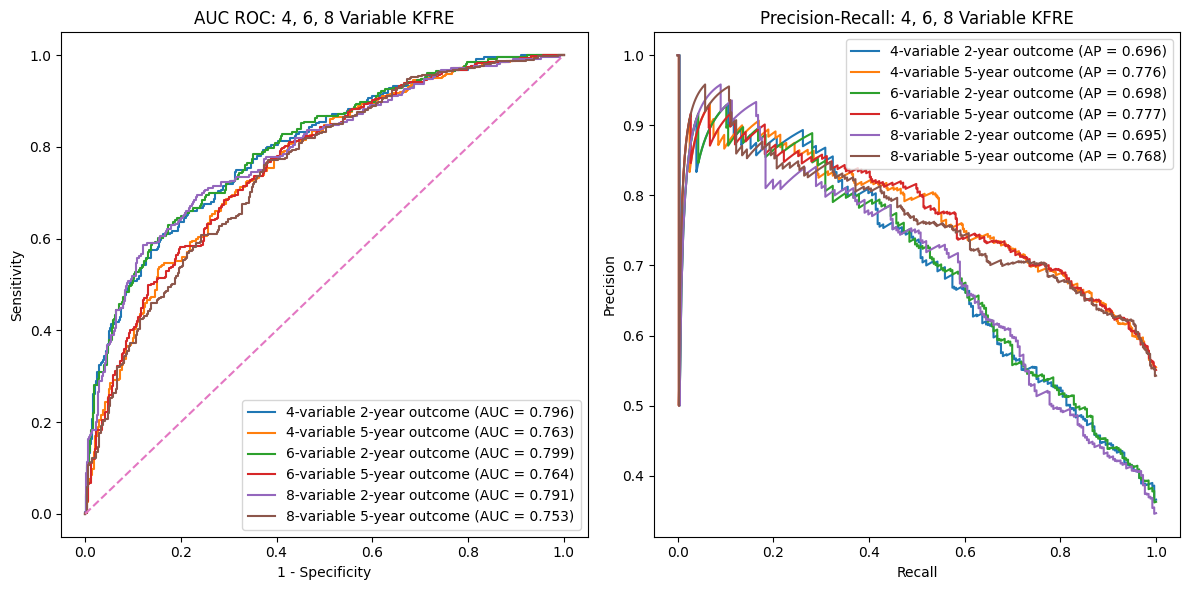

In [38]:
plot_kfre_metrics(
    df=df_ckd_3_to_5,
    num_vars=(4, 6, 8),
    fig_size=[6, 6],
    mode="plot",  # Can be 'prep', 'plot', or 'both'
    # image_prefix="performance",  # Optional prefix for saved images
    bbox_inches="tight",  # Bounding box in inches for the saved images
    plot_type="all_plots",  # Can be 'auc_roc', 'precision_recall', or 'all_plots'
    show_years=[2, 5],  # Year outcomes to show in the plots
    plot_combinations=True,
    image_path_png=image_path_png,
    image_path_svg=image_path_svg,
    save_plots=True,
    show_grids=True,
    decimal_places=3,
)

In [39]:
from kfre import eval_kfre_metrics

In [42]:
metrics_df_n_var = eval_kfre_metrics(
    df_ckd_3_to_5,  # Pass the dataframe df_ckd_3_to_5 as the first argument
    n_var_list=[4, 8],  # Specify the list of variable numbers to consider
    outcome_years=88,  # Specify the list of outcome years to consider
)

metrics_df_n_var

ValueError: Invalid value for year in outcome_years. Valid options are 2, 5, or both as a list or tuple.